# Домашняя работа 2.

### Машинные методы в помощь обработке данным

In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [3]:
import matplotlib.pyplot as plt

https://www.kaggle.com/c/boston-housing/overview

Таблица цен на дома в Бостоне

- CRIM: Это уровень преступности на душу населения по городам
- ZN: Это доля жилой земли, зонированной для участков более 25 000 кв. футов.
- INDUS: Это доля не торговых площадей в каждом городе.
- CHAS: Это фиктивная переменная реки Charles River (она равна 1, если тракт ограничивает реку; в противном случае 0)
- NOX: это концентрация оксидов азота (частей на 10 миллионов)
- RM: это среднее количество комнат на одно жилище
- AGE: Это доля занятых владельцем единиц, построенных до 1940 года
- DIS: Это взвешенные расстояния до пяти бостонских центров занятости
- RAD: Это показатель доступности радиальных магистралей
- TAX: это полная стоимость налога на имущество на 10 000 долларов
- PTRATIO: Это соотношение учеников и учителей по городам
- B: Это рассчитывается как 1000 (Bk - 0,63) ², где Bk - это доля людей афроамериканского происхождения по городам.
- LSTAT: это процент низкого статуса населения
- MEDV: это средняя стоимость домов, занимаемых владельцами, в 1000 долларов.

In [4]:
data_house = pd.read_csv('homework.csv')
data_house.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
data_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


333 строк, пропущенных данных нет

In [6]:
data_house.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

### 1. Решить задачу регрессии:

#### 1 - Выделяем признаки и метки

In [7]:
#признаки и метки
# Формируем признаки и целевую переменную
X = data_house[['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 
                   'tax', 'ptratio', 'black', 'lstat']]
y = data_house['medv']

#### 2 - Разделяем данные на данные для обучения и проверки

Выделим из датасета тренировочные и тестовые данные. 
- **train** Тренировочные данные будем использовать для обучения модели. 
- **test** Тестовые данные будем использовать для подсчета качества модели (20%).

In [8]:
# Разделяем данные на данные для обучения и проверки  train_test_split 20 процентов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
#признаки тренировочных
X_train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
65,95,0.04294,28.0,15.04,0,0.464,6.249,77.3,3.6150,4,270,18.2,396.90,10.59
135,193,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87
12,19,0.80271,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21.0,288.99,11.69
76,115,0.14231,0.0,10.01,0,0.547,6.254,84.2,2.2565,6,432,17.8,388.74,10.45
258,393,11.57790,0.0,18.10,0,0.700,5.036,97.0,1.7700,24,666,20.2,396.90,25.68


In [10]:
#метка тренировочных
y_train.head()

65     20.6
135    36.4
12     20.2
76     18.5
258     9.7
Name: medv, dtype: float64

In [11]:
#признаки тестовых
X_test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
238,361,4.54192,0.0,18.10,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79
193,289,0.04590,52.5,5.32,0,0.405,6.315,45.6,7.3172,6,293,16.6,396.90,7.60
301,463,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666,20.2,396.90,13.99
68,102,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67


In [12]:
#метка тестовых
y_test.head()

331    23.9
238    25.0
193    22.3
301    19.5
68     26.5
Name: medv, dtype: float64

#### 3 - Приводим данные к одному масштабу

In [13]:
#копия тестовых данных
result = X_test.copy()
#сохрянем таргет-значение
result['TARGET'] = y_test
result.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,TARGET
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
238,361,4.54192,0.0,18.10,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0
193,289,0.04590,52.5,5.32,0,0.405,6.315,45.6,7.3172,6,293,16.6,396.90,7.60,22.3
301,463,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666,20.2,396.90,13.99,19.5
68,102,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5


In [14]:
# Приводим данные к одному масштабу
#обучение на трейне и проверка на тесте
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train

array([[-1.00972619, -0.49795632,  0.77598342, ..., -0.13562499,
         0.42790242, -0.25550366],
       [-0.34403215, -0.49068149,  1.53304857, ..., -1.54119305,
         0.34964258, -1.37885105],
       [-1.52597871, -0.37147578, -0.47094743, ...,  1.17623854,
        -0.88957335, -0.0954412 ],
       ...,
       [ 0.40317544, -0.48967932,  1.04318288, ..., -1.11952263,
         0.26564449, -0.53488539],
       [-0.50026646, -0.09732614, -0.47094743, ..., -1.77545439,
        -0.38839292, -0.14928039],
       [-0.63612239, -0.04997481, -0.47094743, ..., -1.77545439,
        -0.12211411,  1.32474929]])

In [16]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [17]:
#один масштаб
X_train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-1.009726,-0.497956,0.775983,0.540180,-0.244461,-0.806545,-0.030481,0.336308,-0.057501,-0.638848,-0.807716,-0.135625,0.427902,-0.255504
1,-0.344032,-0.490681,1.533049,-1.138367,-0.244461,-1.042592,1.315296,-1.515523,1.367730,-0.523482,-0.048792,-1.541193,0.349643,-1.378851
2,-1.525979,-0.371476,-0.470947,-0.458266,-0.244461,-0.159600,-1.179244,-1.141526,0.032794,-0.638848,-0.588340,1.176239,-0.889573,-0.095441
3,-0.873870,-0.481414,-0.470947,-0.187672,-0.244461,-0.080917,-0.023238,0.586850,-0.733352,-0.408117,0.152797,-0.323034,0.328277,-0.275875
4,1.014527,1.422293,-0.470947,0.982970,-0.244461,1.256685,-1.787669,1.051623,-0.975385,1.668465,1.540204,0.801420,0.427902,1.940262


In [18]:
X_test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1.768527,-0.494990,-0.470947,0.090156,-0.244461,0.146388,1.022673,0.833761,-0.777629,-0.984945,-0.789929,1.176239,0.427902,-0.975785
1,0.797158,0.250998,-0.470947,0.982970,-0.244461,1.868660,0.185365,0.724830,-0.603157,1.668465,1.540204,0.801420,0.155153,-0.662935
2,0.308076,-0.497464,1.867048,-0.866326,-0.244461,-1.322352,0.065128,-0.814732,1.784335,-0.408117,-0.671347,-0.885261,0.427902,-0.690583
3,1.490023,0.602754,-0.470947,0.982970,-0.244461,1.370337,0.068026,0.543277,-0.495598,1.668465,1.540204,0.801420,0.427902,0.239235
4,-0.962177,-0.486074,-0.470947,-0.397491,-0.244461,-0.316965,0.740190,0.118446,-0.435052,-0.523482,-0.131800,1.129386,0.411787,-0.680397


#### 4 - Обучение и оценка качества

In [19]:
#создаем временные структуры
TestModels_ms = pd.DataFrame(columns = ['Model', 'train', 'test'])
TestModels_ma = pd.DataFrame(columns = ['Model', 'train', 'test'])
TestModels_r2 = pd.DataFrame(columns = ['Model', 'train', 'test'])

##### LinearRegression (метод наименьших квадратов, линейная регрессия)

In [20]:
#LinearRegression (метод наименьших квадратов, линейная регрессия)
reg = LinearRegression()

In [21]:
#обучаем на данных
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### оценка качества LinearRegression (метод наименьших квадратов)

In [22]:
#Среднеквадратическая ошибка регрессии потери
mean_squared_error(y_train, reg.predict(X_train))

23.516244404614692

In [23]:
#Среднеквадратическая ошибка регрессии потери
mean_squared_error(y_test, reg.predict(X_test))

18.293523886574643

In [24]:
#Средняя абсолютная погрешность регрессии потерь
mean_absolute_error(y_train, reg.predict(X_train))

3.386196645628923

In [25]:
#Средняя абсолютная погрешность регрессии потерь
mean_absolute_error(y_test, reg.predict(X_test))

3.2895864430218924

In [26]:
#(коэффициент детерминации) функция оценки регрессии
r2_score(y_train, reg.predict(X_train))

0.719535830733917

In [27]:
#(коэффициент детерминации) функция оценки регрессии
r2_score(y_test, reg.predict(X_test))

0.778841473306935

In [28]:
#сохраняем результаты
TestModels_ms.loc[0] = ['LinearRegression',
                     mean_squared_error(y_train, reg.predict(X_train)),
                     mean_squared_error(y_test, reg.predict(X_test))          
]


TestModels_ma.loc[0] = ['LinearRegression',
                     mean_absolute_error(y_train, reg.predict(X_train)),
                     mean_absolute_error(y_test, reg.predict(X_test))
                     
]

TestModels_r2.loc[0] = ['LinearRegression',
                     r2_score(y_train, reg.predict(X_train)),
                     r2_score(y_test, reg.predict(X_test))                     
]

In [29]:
#сохраняем предсказания
result['PREDICTION_LinearRegression'] = reg.predict(X_test)

##### Epsilon-Support Vector Regression (метод опорных векторов с линейным ядром)

In [30]:
#Epsilon-Support Vector Regression
clf = SVR(C=1.0, epsilon=0.2)

In [31]:
##обучаем на данных
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

##### оценка качества Epsilon-Support Vector Regression

In [32]:
#Среднеквадратическая ошибка регрессии потери
mean_squared_error(y_train, clf.predict(X_train))

35.072633022162776

In [33]:
#Среднеквадратическая ошибка регрессии потери
mean_squared_error(y_test, clf.predict(X_test))

31.160614571803457

In [34]:
#Средняя абсолютная погрешность регрессии потерь
mean_absolute_error(y_train, clf.predict(X_train))

3.2511694041688703

In [35]:
#Средняя абсолютная погрешность регрессии потерь
mean_absolute_error(y_test, clf.predict(X_test))

3.666187640090654

In [36]:
#(коэффициент детерминации) функция оценки регрессии
r2_score(y_train, clf.predict(X_train))

0.5817097018006503

In [37]:
#(коэффициент детерминации) функция оценки регрессии
r2_score(y_test, clf.predict(X_test))

0.6232855051722412

In [38]:
#сохраняем результаты
TestModels_ms.loc[1] = ['SupportVectorRegression',
                     mean_squared_error(y_train, clf.predict(X_train)),
                     mean_squared_error(y_test, clf.predict(X_test))                     
]

TestModels_ma.loc[1] = ['SupportVectorRegression',
                     mean_absolute_error(y_train, clf.predict(X_train)),
                     mean_absolute_error(y_test, clf.predict(X_test))                     
]

TestModels_r2.loc[1] = ['SupportVectorRegression',
                     r2_score(y_train, clf.predict(X_train)),
                     r2_score(y_test, clf.predict(X_test))                     
]

In [39]:
#сохраняем предсказания
result['PREDICTION_SupportVectorRegression'] = clf.predict(X_test)

##### DecisionTreeRegressor (метод дерева решений)

In [40]:
# DecisionTreeRegressor (метод дерева решений)
regressor = DecisionTreeRegressor()

In [41]:
#обучаем на данных
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

##### оценка качества DecisionTreeRegressor (метод дерева решений)

In [42]:
#Среднеквадратическая ошибка регрессии потери
mean_squared_error(y_train, regressor.predict(X_train))

0.0

In [43]:
#Среднеквадратическая ошибка регрессии потери
mean_squared_error(y_test, regressor.predict(X_test))

14.048059701492537

In [44]:
#Средняя абсолютная погрешность регрессии потерь
mean_absolute_error(y_train, regressor.predict(X_train))

0.0

In [45]:
#Средняя абсолютная погрешность регрессии потерь
mean_absolute_error(y_test, regressor.predict(X_test))

2.991044776119403

In [46]:
#(коэффициент детерминации) функция оценки регрессии
r2_score(y_train, regressor.predict(X_train))

1.0

In [47]:
#(коэффициент детерминации) функция оценки регрессии
r2_score(y_test, regressor.predict(X_test))

0.8301667734580991

In [48]:
#сохраняем результаты
TestModels_ms.loc[2] = ['DecisionTreeRegressor',
                     mean_squared_error(y_train, regressor.predict(X_train)),
                     mean_squared_error(y_test, regressor.predict(X_test))                     
]

TestModels_ma.loc[2] = ['DecisionTreeRegressor',
                     mean_absolute_error(y_train, regressor.predict(X_train)),
                     mean_absolute_error(y_test, regressor.predict(X_test))                     
]

TestModels_r2.loc[2] = ['DecisionTreeRegressor',
                     r2_score(y_train, regressor.predict(X_train)),
                     r2_score(y_test, regressor.predict(X_test))                     
]

In [49]:
#сохраняем предсказания
result['PREDICTION_DecisionTreeRegressor'] = regressor.predict(X_test)

#### 5 - визуализация оценки качества

In [50]:
#оценка Среднеквадратическая ошибка регрессии потери
TestModels_ms

,Model,train,test
0,LinearRegression,23.516244,18.293524
1,SupportVectorRegression,35.072633,31.160615
2,DecisionTreeRegressor,0.000000,14.048060


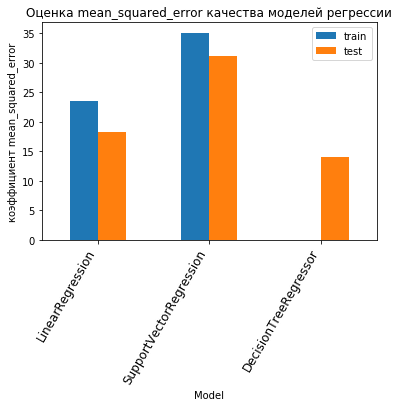

In [51]:
#визуализация оценок
TestModels_ms.plot(kind='bar')
plt.xticks( TestModels_ms.index, TestModels_ms.Model, rotation=60, horizontalalignment='right', fontsize=12)
plt.xlabel('Model')
plt.ylabel('коэффициент mean_squared_error')
plt.title('Оценка mean_squared_error качества моделей регрессии')
plt.show()

Метрика измеряет среднюю сумму квадратной разности между фактическим значением и прогнозируемым значением для всех точек данных.

Для среднеквадратической ошибки наименьшее значение коэффициента - лучшее. 
Поэтому можно сделать вывод, что лучше других с задачей справился метод DecisionTreeRegressor (метод дерева решений).

Его коэффициенты ниже остальных как на тренировочных, так и тестовых данных:
- train=0
- test=14.048060

In [52]:
#Средняя абсолютная погрешность регрессии потерь
TestModels_ma

,Model,train,test
0,LinearRegression,3.386197,3.289586
1,SupportVectorRegression,3.251169,3.666188
2,DecisionTreeRegressor,0.000000,2.991045


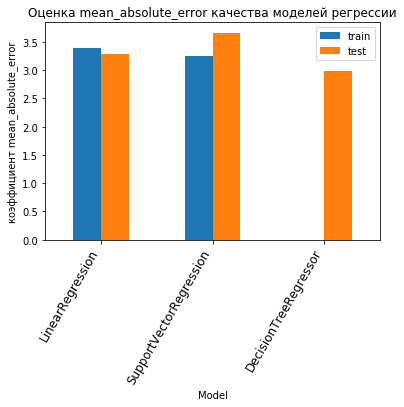

In [53]:
#визуализация оценок
TestModels_ma.plot(kind='bar')
plt.xticks( TestModels_ma.index, TestModels_ma.Model, rotation=60, horizontalalignment='right', fontsize=12)
plt.xlabel('Model')
plt.ylabel('коэффициент mean_absolute_error')
plt.title('Оценка mean_absolute_error качества моделей регрессии')
plt.show()

Метрика измеряет среднюю сумму абсолютной разницы между фактическим значением и прогнозируемым значением.

Значение 0 указывает на отсутствие ошибок или точных прогнозов. Поэтому можно сделать вывод, что лучше других с задачей справился метод DecisionTreeRegressor (метод дерева решений).

Его коэффициенты ниже остальных как на тренировочных, так и тестовых данных:

- train=0
- test=2.991045

In [54]:
#(коэффициент детерминации) функция оценки регрессии
TestModels_r2

,Model,train,test
0,LinearRegression,0.719536,0.778841
1,SupportVectorRegression,0.581710,0.623286
2,DecisionTreeRegressor,1.000000,0.830167


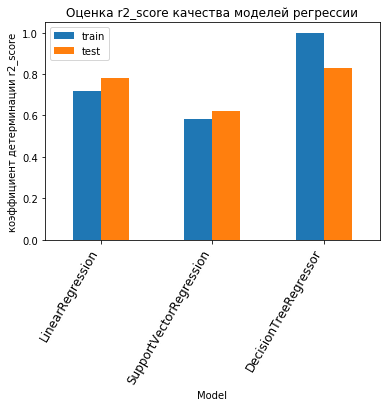

In [55]:
#визуализация оценок
TestModels_r2.plot(kind='bar')
plt.xticks( TestModels_r2.index, TestModels_r2.Model, rotation=60, horizontalalignment='right', fontsize=12)
plt.xlabel('Model')
plt.ylabel('коэффициент детерминации r2_score')
plt.title('Оценка r2_score качества моделей регрессии')
plt.show()

Из графика выше, можно сделать вывод, что лучше других с задачей справился метод DecisionTreeRegressor (метод дерева решений).

Его коэффициенты детерминации (r2_score) выше остальных как на тренировочных, так и тестовых данных:
- train=1.000000
- test=0.830167

(Если же коэффициент детерминации алгоритма близок к 1, скорей всего, это хороший алгоритм, который близок к оптимальному.)

#### 6 - визуализация предсказанных значений

In [56]:
#тестовые данные, таргет-значение и предсказанное значение всеми алгоритмами
result

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,TARGET,PREDICTION_LinearRegression,PREDICTION_SupportVectorRegression,PREDICTION_DecisionTreeRegressor
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,27.560678,23.661798,31.6
238,361,4.54192,0.0,18.10,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0,25.543093,20.867142,20.7
193,289,0.04590,52.5,5.32,0,0.405,6.315,45.6,7.3172,6,293,16.6,396.90,7.60,22.3,26.805463,25.778584,23.8
301,463,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666,20.2,396.90,13.99,19.5,21.193168,18.673692,21.7
68,102,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5,26.598533,23.726482,30.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,478,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0,11.427117,13.616196,13.8
323,491,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1,0.064331,17.002135,15.6
227,343,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5,21.069960,25.659793,24.1
102,151,1.65660,0.0,19.58,0,0.871,6.122,97.3,1.6180,5,403,14.7,372.80,14.10,21.5,21.628538,20.658852,22.7


In [57]:
rez = result[['ID','TARGET', 'PREDICTION_LinearRegression', 'PREDICTION_SupportVectorRegression', 'PREDICTION_DecisionTreeRegressor']].sort_values(by='ID', ascending=True)
rez

,ID,TARGET,PREDICTION_LinearRegression,PREDICTION_SupportVectorRegression,PREDICTION_DecisionTreeRegressor
0,1,24.0,30.784855,27.460030,32.5
19,32,14.5,18.938006,17.397438,20.4
22,40,30.8,32.081494,27.464707,28.0
24,43,25.3,26.230972,24.477097,24.7
27,46,19.3,22.482166,21.027280,17.4
...,...,...,...,...,...
322,489,15.2,10.323453,18.558790,16.2
323,491,8.1,0.064331,17.002135,15.6
327,498,18.3,17.861579,19.476841,21.8
331,504,23.9,27.560678,23.661798,31.6


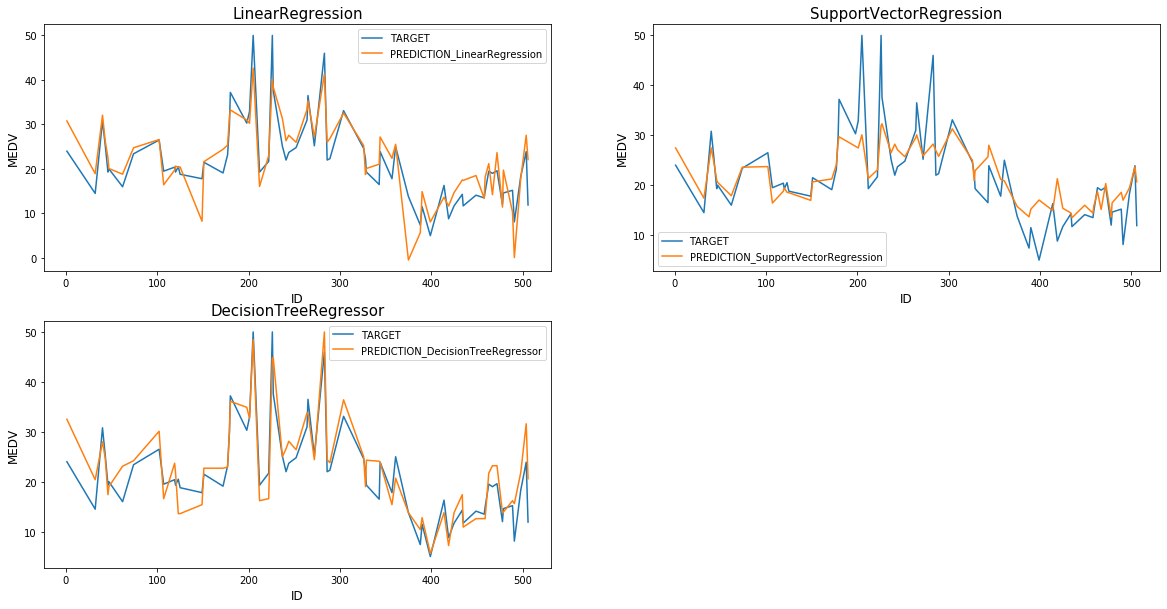

In [72]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.plot(list(rez['ID']), list(rez['TARGET']), label='TARGET')
plt.plot(list(rez['ID']), list(rez['PREDICTION_LinearRegression']), label='PREDICTION_LinearRegression')
plt.title('LinearRegression', fontsize=15)
plt.xlabel('ID', fontsize=12)
plt.ylabel('MEDV', fontsize=12)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(list(rez['ID']), list(rez['TARGET']), label='TARGET')
plt.plot(list(rez['ID']), list(rez['PREDICTION_SupportVectorRegression']), label='PREDICTION_SupportVectorRegression')
plt.title('SupportVectorRegression', fontsize=15)
plt.xlabel('ID', fontsize=12)
plt.ylabel('MEDV', fontsize=12)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(list(rez['ID']), list(rez['TARGET']), label='TARGET')
plt.plot(list(rez['ID']), list(rez['PREDICTION_DecisionTreeRegressor']), label='PREDICTION_DecisionTreeRegressor')
plt.title('DecisionTreeRegressor', fontsize=15)
plt.xlabel('ID', fontsize=12)
plt.ylabel('MEDV', fontsize=12)
plt.legend()

plt.show()

Также визуально линия с предсказанными значениями наимболее близка к линии с таргет-значениями у модели DecisionTreeRegressor (метод дерева решений).